# Titatic Disaster

## Author: Nicolas Hernandez Zapata

### Description
Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Import libraries and check available files

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


We have 3 available datasets. Train, test and gender_submission. The last is only an example of how the data should be formatted in order to submit the results in Kaggle. 

Test-set is for the submission so we started by analyzing the train-dataset.

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Train set size:", train.shape)

Train set size: (891, 12)


* PassengerId: Number ID for each passenger.
* Survived: Target column which defines if the person survived or not.
* Pclass: Int variable which corresponds to the ticket class.
* Name: Name of the passenger.
* Sex: Sex of the passenger.
* Age: Age of the passenger
* SibSp: Number of siblings or spouses in the Titanic
* Parch: Number of parents or childrens in the Titanic
* Ticket: Ticket number
* Fare: Ticket price
* Cabin: Cabin number
* Embarked: Port of embarkation

#### General analysis

In [4]:
train_cleaned = train[["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].copy()
train_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Exploratory analysis

In [5]:
train_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [6]:
train_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Target distribution

In [7]:
train_cleaned['Survived'].value_counts()/len(train_cleaned) * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

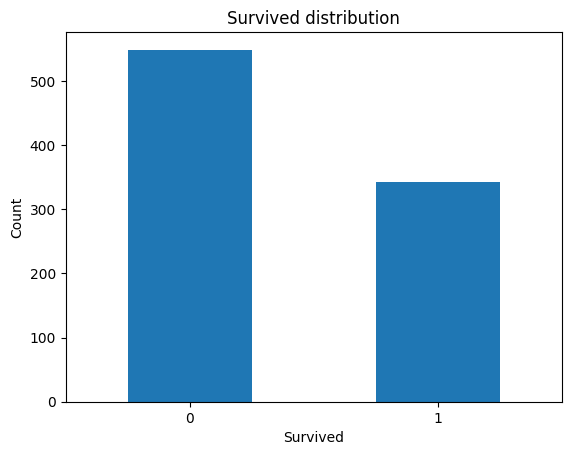

In [8]:
counts = train_cleaned['Survived'].value_counts()
counts.plot(kind='bar')
plt.title('Survived distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'], rotation=0)  # Label x-axis
plt.show()

Over 60% of the people die.

#### Pclass distribution

In [9]:
train_cleaned['Pclass'].value_counts()/len(train_cleaned) * 100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64

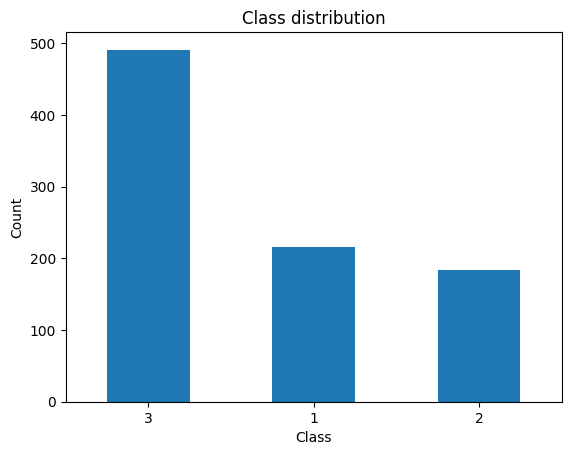

In [10]:
counts = train_cleaned['Pclass'].value_counts()
counts.plot(kind='bar')
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['3', '1', '2'], rotation=0)  # Label x-axis
plt.show()

More than 50% of the people on board was in the lowest class

#### Sex distribution

In [11]:
train_cleaned['Sex'].value_counts()/len(train_cleaned) * 100

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

2/3 of the people were males

#### Age distribution

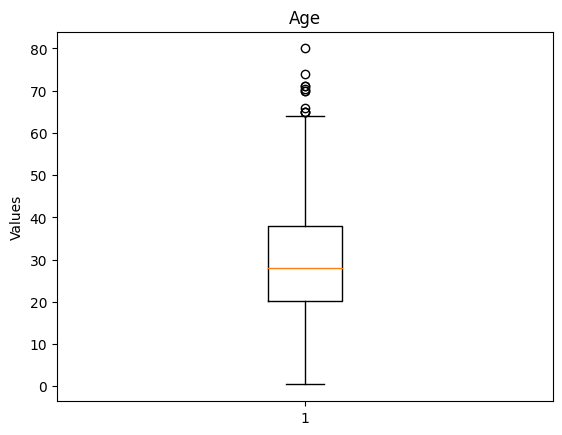

In [12]:
plt.figure()
plt.boxplot(train_cleaned['Age'].dropna())
plt.title('Age')
plt.ylabel('Values')
plt.show()

#### SibSp distribution

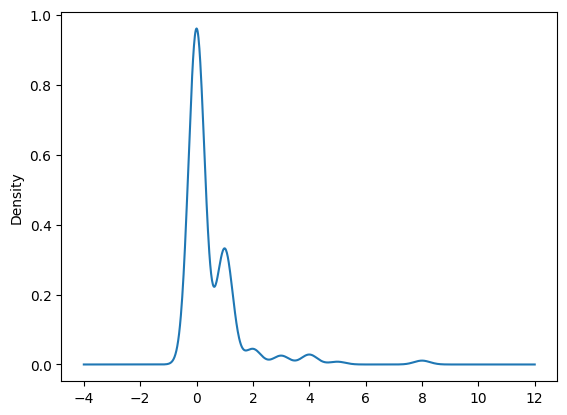

In [13]:
ax = train_cleaned['SibSp'].plot.kde()

The mayority of people was traveling without siblings or spouses

#### Parch distribution

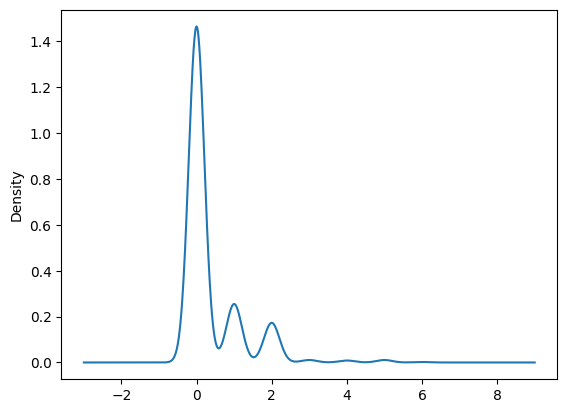

In [14]:
ax = train_cleaned['Parch'].plot.kde()

The mayority of people travel without parents or children

#### Fare distribution

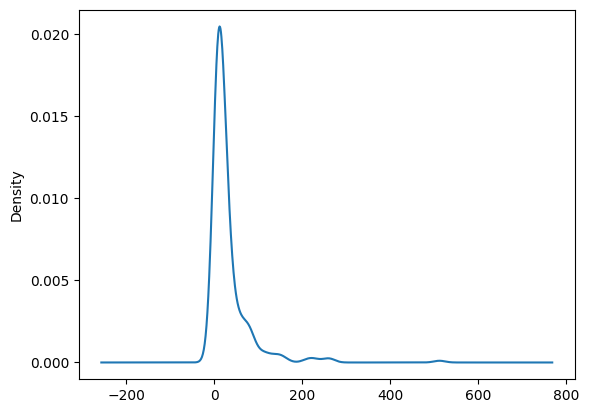

In [15]:
ax = train_cleaned['Fare'].plot.kde()

Due to the hogh amount of low class ticket, the fares tend to distribute to the lower prices

#### Relation with the target variable

First we start by checking the relation between the target and the two categorical variables

<Axes: xlabel='Sex', ylabel='count'>

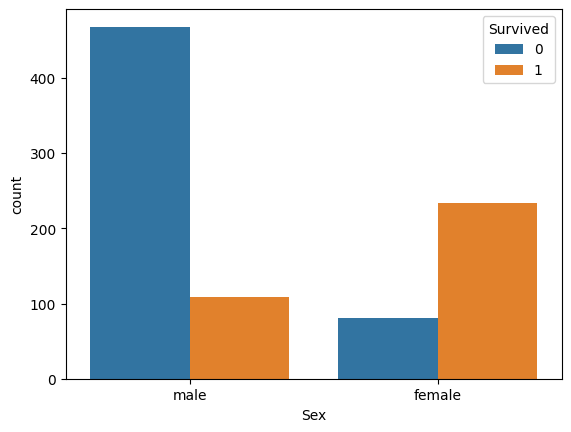

In [16]:
import seaborn as sns
sns.countplot(train_cleaned, x="Sex", hue="Survived")

<Axes: xlabel='Embarked', ylabel='count'>

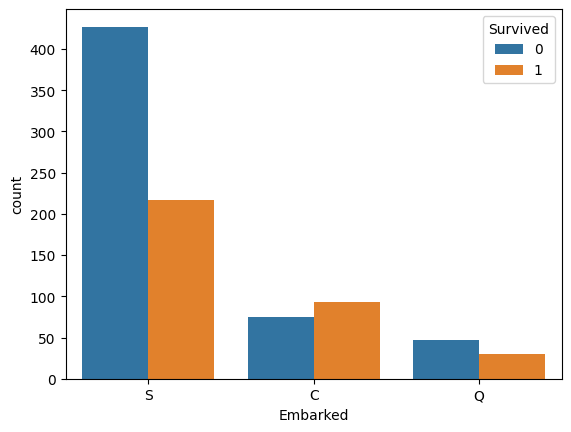

In [17]:
import seaborn as sns
sns.countplot(train_cleaned, x="Embarked", hue="Survived")

Now let's look relation with other numerical variables

<Axes: xlabel='Pclass', ylabel='count'>

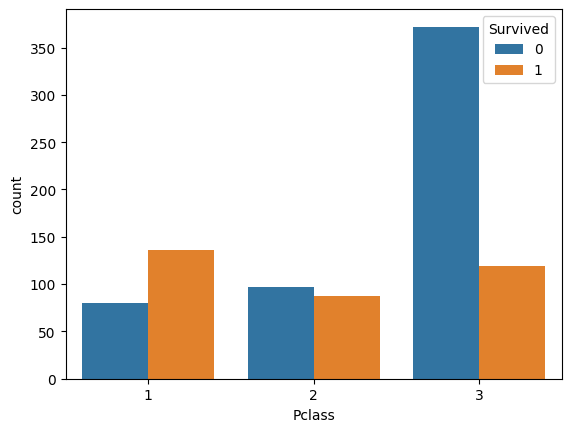

In [18]:
import seaborn as sns
sns.countplot(train_cleaned, x="Pclass", hue="Survived")

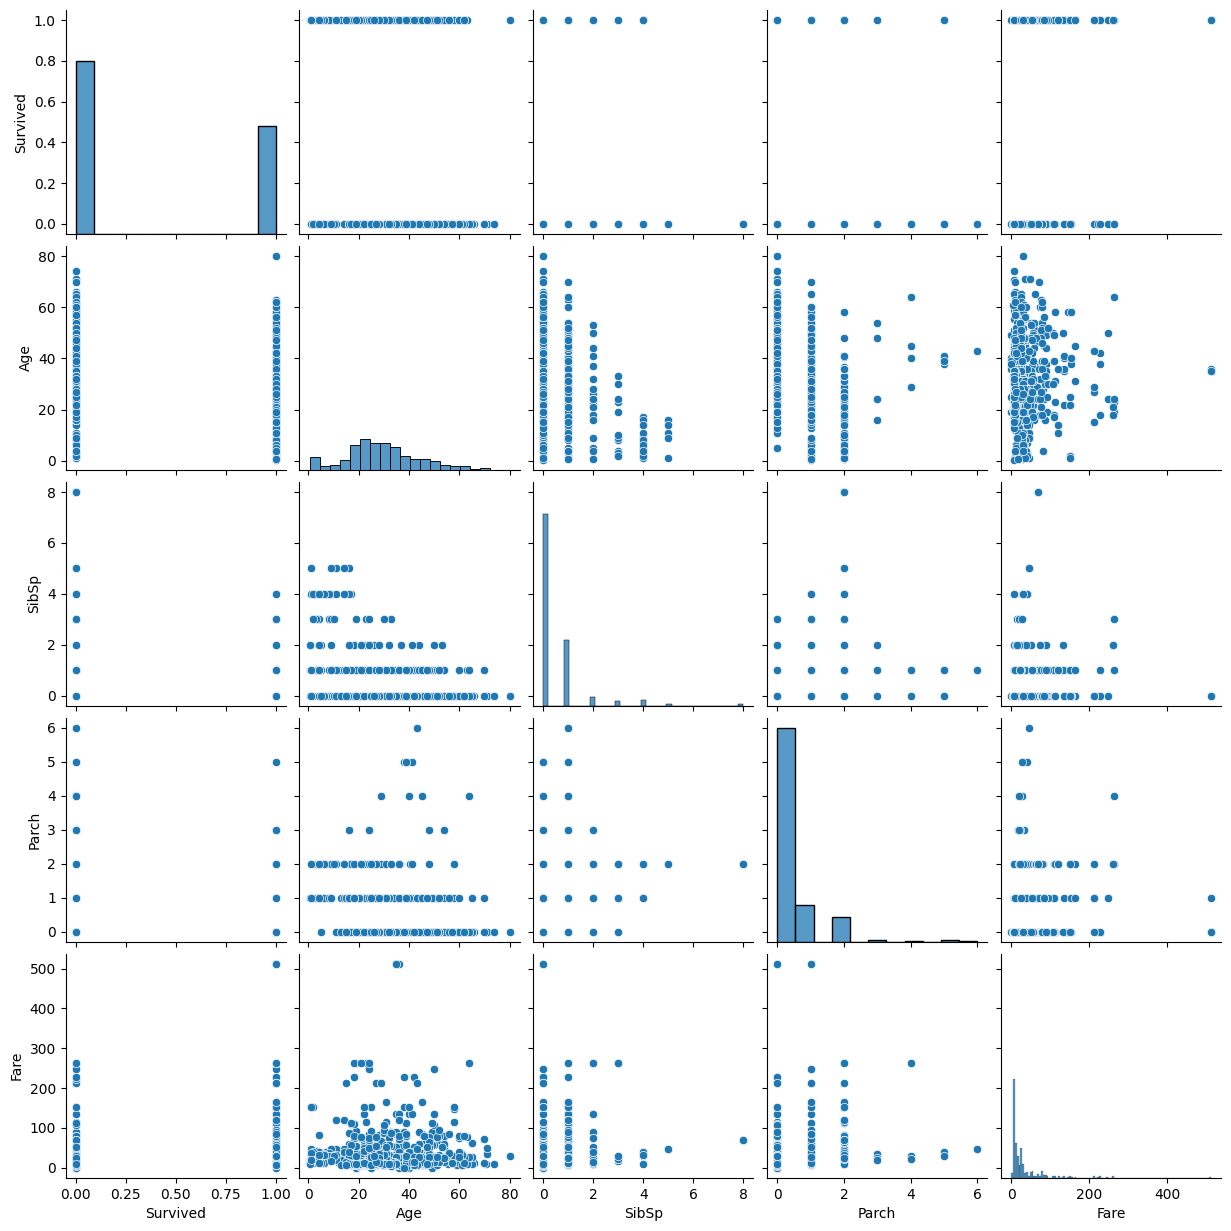

In [19]:
train_num_data = train_cleaned[["Survived", "Age", "SibSp", "Parch", "Fare"]].copy()
sns.pairplot(train_num_data)

<Axes: >

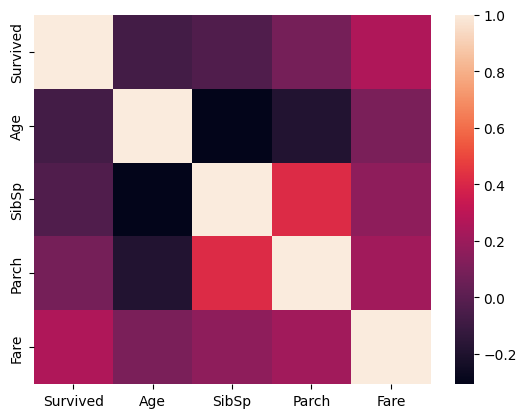

In [20]:
corr = train_num_data.corr()
sns.heatmap(corr)

Individually numerical values are not strongly correlated with the target variable. The fare is the only one that started to show a significative positive correlation and it's due to it strong relation with the Pclass variable which shown that the higher the class higher the possibility to survive.

The categorical variables shown a strong indication that these are the ones that should be taken into account and would be the ones that had higher impact in a model.

In the next notebook some models would be tested in the following order until the prediction results show an acceptable accurracy:
* CatBoostClassifier taking into account only Sex, Embarked and Pclass
* CatBoostClassifier taking into account all numeric and categorical variables except Age
* Fill empty values in Age column and add it to the previous model
* Shap analysis to determine the most important variables
* Test different models to compare it's performance. These models includes:
  *  Random Forest Classifier
  *  Naive Bayes
  *  Linear discriminant analysis
  *  KNN
  *  Logistic regression
  *  Neural network
  *  SVM

End notebook.

Estimated time: ~1 hour.